In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
elastic_net = pd.read_csv("./metrics/011_elastic_net.csv.zip")
lasso = pd.read_csv("./metrics/011_lasso.csv.zip")
linear_regression = pd.read_csv("./metrics/011_linear_regression.csv.zip")
logistic_regression = pd.read_csv("./metrics/011_logistic_regression.csv.zip")
random_forest = pd.read_csv("./metrics/011_random_forest.csv.zip")
decision_tree = pd.read_csv("./metrics/011_decision_tree.csv.zip")
mlp = pd.read_csv("./metrics/011_mlpr.csv.zip")
xgboost = pd.read_csv("./metrics/011_xgboost.csv.zip")

In [3]:
metrics = pd.concat([elastic_net,lasso,
                     linear_regression,logistic_regression,
                     random_forest,decision_tree,mlp,xgboost])

In [4]:
metrics.sort_values("r2",ascending=False,inplace=True)

In [5]:
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,XGBoost,0.946265,62.886528,8353.037000,91.394950,2.390617e+15,0.426474,0.028576
0,Random Forest,0.943911,60.608562,8719.043945,93.375824,1.948918e+15,5.254787,0.292970
0,Decision Tree,0.940510,56.923329,9247.683218,96.164875,9.983341e+14,0.372802,0.014554
0,MLP,0.812934,127.296380,29079.238000,170.526350,4.872934e+15,71.680440,0.046930
0,Lasso,0.326977,266.851654,104621.007812,323.451721,4.648693e+15,0.038460,0.010525
0,Linear Regression,0.326685,266.826447,104666.296875,323.521698,4.640618e+15,0.362885,0.014279
0,Elastic Net,0.288791,278.552521,110556.945312,332.501038,4.783149e+15,0.034600,0.011352
0,Logistic Regression,-0.074436,284.986145,167020.281250,408.681152,1.609626e+15,2.343918,0.029932


In [6]:
metrics.to_csv("./metrics/012_initial_metrics.csv.zip",index=False,compression="zip")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


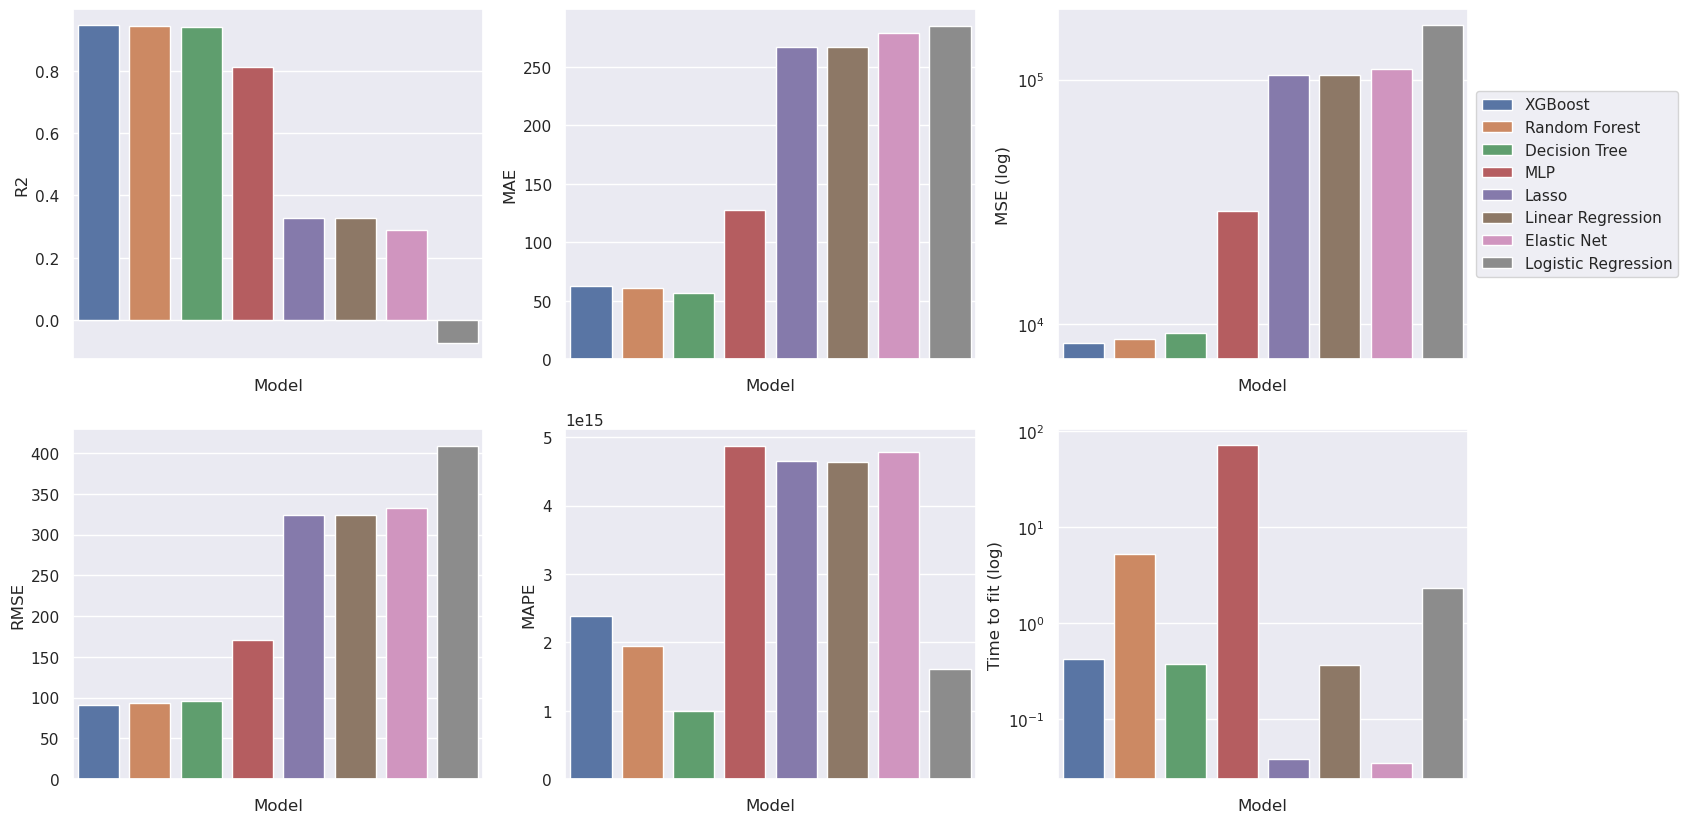

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.barplot(ax=axes[0, 0], data=metrics, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics, x='model', y='mae',hue="model",dodge=False)
sns.barplot(ax=axes[0, 2], data=metrics, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics, x='model', y='rmse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 2], data=metrics, x='model', y='time_to_fit',hue="model",dodge=False)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].get_legend().remove()

axes[0, 2].set(xlabel="Model",xticklabels=[])
axes[0, 2].set(ylabel="MSE (log)",yscale="log")
axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="MAPE")
axes[1, 1].get_legend().remove()

axes[1, 2].set(xlabel="Model",xticklabels=[])
axes[1, 2].set(ylabel="Time to fit (log)",yscale="log")
axes[1, 2].get_legend().remove()

plt.savefig("./plots/012_gardiner_count_only_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/012_gardiner_count_only_metrics.png",bbox_inches="tight")Perceptron